In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
np.set_printoptions(precision=4)
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [76]:
#reading csv file 
weather = pd.read_csv('clean_weather_data.csv')

In [22]:
weather.head()

,day,tempMin,tempMax,summary,desc,cloudCover,humidity,windSpeed,visibility
0,2015-01-01,7.53,12.23,Possible light rain until evening.,rain,0.80,0.89,14.69,4.43
1,2015-01-02,3.58,7.15,Possible light rain throughout the day.,rain,0.62,0.79,15.04,5.64
2,2015-01-03,-0.61,6.54,Clear throughout the day.,rain,0.31,0.84,4.48,6.20
3,2015-01-04,-0.63,7.59,Mostly cloudy throughout the day.,partly-cloudy-day,0.78,0.85,4.35,6.22
4,2015-01-05,6.51,10.43,Overcast throughout the day.,partly-cloudy-day,0.85,0.91,6.20,5.91


In [77]:
# converting to timestamp 
weather['date'] = pd.to_datetime(weather.day)
weather.set_index('date', inplace=True, drop=True)
weather.head()

,day,tempMin,tempMax,summary,desc,cloudCover,humidity,windSpeed,visibility
date,,,,,,,,,
2015-01-01,2015-01-01,7.53,12.23,Possible light rain until evening.,rain,0.80,0.89,14.69,4.43
2015-01-02,2015-01-02,3.58,7.15,Possible light rain throughout the day.,rain,0.62,0.79,15.04,5.64
2015-01-03,2015-01-03,-0.61,6.54,Clear throughout the day.,rain,0.31,0.84,4.48,6.20
2015-01-04,2015-01-04,-0.63,7.59,Mostly cloudy throughout the day.,partly-cloudy-day,0.78,0.85,4.35,6.22
2015-01-05,2015-01-05,6.51,10.43,Overcast throughout the day.,partly-cloudy-day,0.85,0.91,6.20,5.91


In [95]:
weather.isnull().sum()

day           0
tempMin       0
tempMax       0
summary       0
desc          0
cloudCover    0
humidity      0
windSpeed     0
visibility    0
dtype: int64

In [103]:
weather.dtypes

day            object
tempMin       float64
tempMax       float64
summary        object
desc           object
cloudCover    float64
humidity      float64
windSpeed     float64
visibility    float64
dtype: object

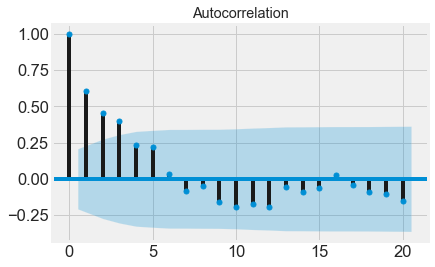

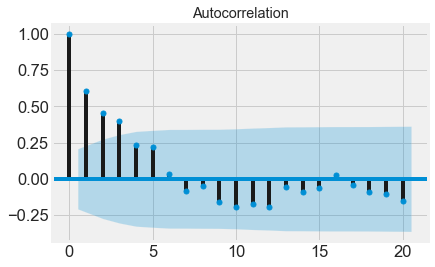

In [99]:
plot_acf(weather.windSpeed)

In [78]:
# I chose to forecast 3 months because plot of 5 years is not quite clear so I used I loc to work on 3 month period 
weather = weather.iloc[1:90]

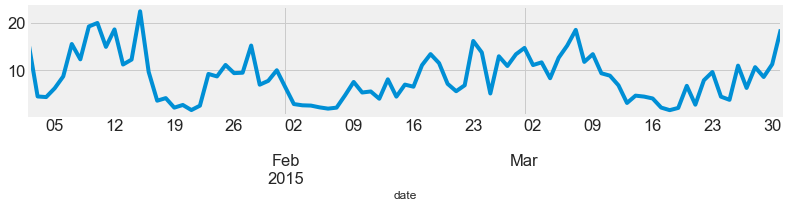

In [93]:
# vigualize
weather['windSpeed'].plot(lw=4, figsize=(12, 2))
plt.show()

In [80]:
# stationary
ws_rate = weather.windSpeed
ws_diff = ws_rate.diff()[1:]

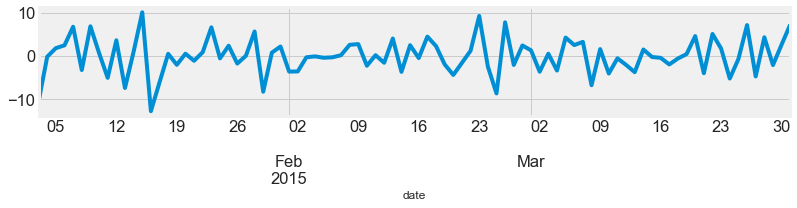

In [102]:
ws_diff.plot(lw=4, figsize=(12, 2))

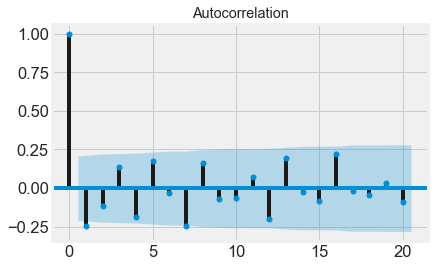

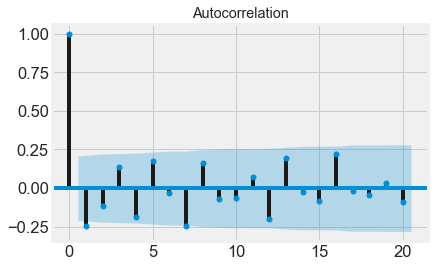

In [100]:
plot_acf(ws_diff)

In [81]:
# fitting ARIMA model 
from statsmodels.tsa.arima_model import ARIMA, ARMA, AR

model = ARIMA(ws_rate,order=(2,1,1)).fit(trend='nc')
model.summary2()



/Users/abrar2afar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/abrar2afar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 508.7989  
Dependent Variable: D.windSpeed      Log-Likelihood:      -245.44   
Date:               2019-12-03 13:11 Scale:               1.0000    
No. Observations:   88               Method:              css-mle   
Df Model:           3                Sample:              01-03-2015
Df Residuals:       85                                    03-31-2015
Converged:          1.0000           S.D. of innovations: 3.930     
No. Iterations:     10.0000          HQIC:                502.882   
AIC:                498.8895                                        
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
ar.L1.D.windSpeed    -0.9197   0.2292 -4.0127 0.0001 -1.3690 -0.4705
ar.L2.D.windSpeed    -0.3778   0.1062 -3.5564 0.0006 -0.5860 -0.1696
ma.L1.D.windSpeed     0.6249   0.2274  2.7480 0.0073  0.1792  1.0706
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -1.2173            -1.0795           1.6270            -0.3845
AR.2           -1.2173             1.0795           1.6270             0.3845
MA.1           -1.6002             0.0000           1.6002             0.5000
====================================================================

"""

In [82]:
#fitting ARMA
model = ARMA(ws_diff,order=(2,3))

/Users/abrar2afar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [91]:
result = model.fit(start_params=[0,0,0,0,0],solver='lbfgs',method='css',trend='nc',ic='BIC')

In [84]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 500.9950  
Dependent Variable: windSpeed        Log-Likelihood:      -237.13   
Date:               2019-12-03 13:11 Scale:               1.0000    
No. Observations:   88               Method:              css       
Df Model:           5                Sample:              01-05-2015
Df Residuals:       81                                    03-31-2015
Converged:          1.0000           S.D. of innovations: 3.813     
No. Iterations:     23.0000          HQIC:                492.195   
AIC:                486.2689                                        
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
ar.L1.windSpeed  -0.9679    0.3211  -3.0141  0.0034  -1.5972  -0.3385
ar.L2.windSpeed  -0.3206    0.3266  -0.9815  0.3293  -0.9608   0.3196
ma.L1.windSpeed   0.6678    0.3488   1.9147  0.0591  -0.0158   1.3513
ma.L2.windSpeed  -0.1144    0.2749  -0.4161  0.6785  -0.6532   0.4244
ma.L3.windSpeed  -0.0712    0.2041  -0.3491  0.7279  -0.4712   0.3287
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -1.5095            -0.9169           1.7662            -0.4131
AR.2           -1.5095             0.9169           1.7662             0.4131
MA.1            3.0256             0.0000           3.0256             0.0000
MA.2           -1.4654             0.0000           1.4654             0.5000
MA.3           -3.1657             0.0000           3.1657             0.5000
====================================================================

"""

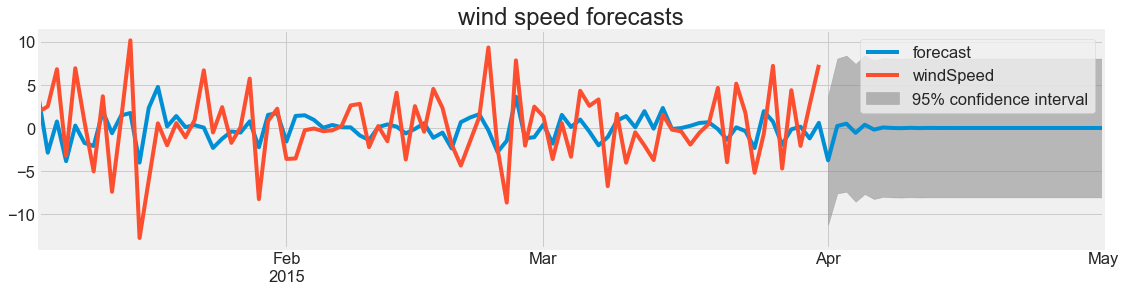

In [98]:
# plotting the wind speed forcasts 
init_1 = 2
end_1 = len(ws_diff)+30
fig, ax = plt.subplots(figsize=(17,4))
result.plot_predict(init_1,end_1,dynamic=False,plot_insample=True,ax=ax)
ax.set_title('wind speed forecasts',fontsize=24)
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
# Mean square error 
print('MSE sklearn:\t\t', mean_squared_error(ws_diff[2:], result.fittedvalues[:]))
print('MSE statsmodels:\t', result.sigma2)

MSE sklearn:		 14.539625107622507
MSE statsmodels:	 14.539625107622506


In [88]:
mean_squared_error(ws_diff, [ws_diff.mean()] * len(ws_diff))

17.785002272727272